<a href="https://colab.research.google.com/github/Abhishek-Parth/AI-foundations-ICG/blob/main/240039_Abhishek_assign0_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple application of essential python libraries

Get an intuitive and applicative understanding of numpy, pandas and matplotlib by using these libraries to play with data often found in real life applications.

This book is for understanding the libraries, so make sure to experiment as much as you can, you dont have to stick to exactly what is asked.

Guidelines:

*   Fill the codeblocks according to the comments given
*   Hints are given wherever required
*   Your first debugging step should be to print errors to identify the issue.Understand why it went wrong by analyzing the outputs and error messages. Adjust your code to fix the problem systematically.
*   If stuck, you're welcome to utilize any online resources, and feel free to ask doubts in the group!


In [ ]:
#import necessary dependencies
import urllib.request
# ...other dependencies

##Data to work on

In [ ]:
# Step 1: Load the dataset, dont focus on this part
url = "https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv"
filename = "airtravel.csv"
urllib.request.urlretrieve(url, filename)

('airtravel.csv', <http.client.HTTPMessage at 0x7d66d449acb0>)

Where did this .csv file get saved? load it using pandas!

In [ ]:
#load the .csv file using pandas
import pandas as pd
import numpy as np
df=pd.read_csv('airtravel.csv')
print(df.to_string)
#create an ndarray from this pandas df, but ignore the "Month" column (slicing, maybe?)
ar=df.loc[:, df.columns != 'Month']
ar=np.array(ar)
print(ar)

<bound method DataFrame.to_string of    Month   "1958"   "1959"   "1960"
0    JAN      340      360      417
1    FEB      318      342      391
2    MAR      362      406      419
3    APR      348      396      461
4    MAY      363      420      472
5    JUN      435      472      535
6    JUL      491      548      622
7    AUG      505      559      606
8    SEP      404      463      508
9    OCT      359      407      461
10   NOV      310      362      390
11   DEC      337      405      432>
[[340 360 417]
 [318 342 391]
 [362 406 419]
 [348 396 461]
 [363 420 472]
 [435 472 535]
 [491 548 622]
 [505 559 606]
 [404 463 508]
 [359 407 461]
 [310 362 390]
 [337 405 432]]


In [ ]:
#Calculate the mean value across all three years for each month (mean_original) using an np function and return an ndarray consisting mean passengers for each month
def mean_original(arr):
  mean_1=np.mean(arr,axis=1)
  return mean_1
print(mean_original(ar))

[372.33333333 350.33333333 395.66666667 401.66666667 418.33333333
 480.66666667 553.66666667 556.66666667 458.33333333 409.
 354.         391.33333333]


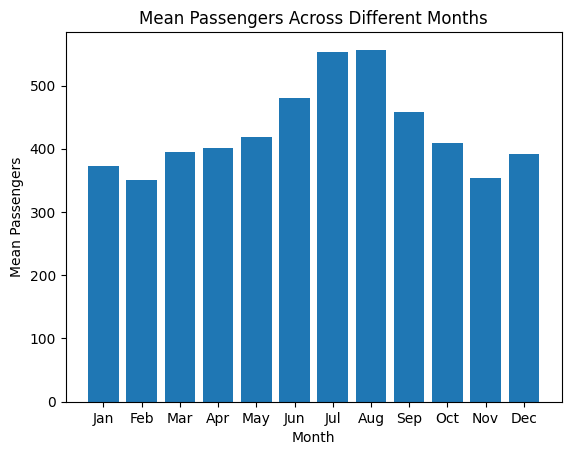

In [ ]:
#use matplotlib to plot a bargraph to visualize mean number of passengers across different months
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df=pd.read_csv('airtravel.csv')
ar=df.loc[:, df.columns != 'Month']
ar=np.array(ar)
mean_passengers = mean_original(ar)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(months, mean_passengers)
plt.xlabel("Month")
plt.ylabel("Mean Passengers")
plt.title("Mean Passengers Across Different Months")
plt.show()


##Transforming data

Let's visualize the data

Simulate a spike across the data

In [ ]:
#Simply create a list with the same shape as previous arrays, and fill it with data simulating a spike across months peaking at 100, width, number of peaks, etc. are upto you!
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

spike_data = [5, 10, 20, 60, 100, 60, 20, 10, 5, 5, 5, 0]


#convert the list to a pandas series spike_series, and the mean_original to a pandas series also

spike_series = pd.Series(spike_data)
print(spike_series)
original_series = pd.Series(mean_original(ar))
print(original_series)

#define a function called transform_orig() that adds spike_series element-wise to original_series (use .add())
def transform_orig(original_series, spike_series):
  return original_series.add(spike_series, fill_value=0)

#call the function and obtain a spiked_data series, and convert it back to a list
spiked_data_series=transform_orig(original_series, spike_series)
spiked_data_list = spiked_data_series.tolist()
print(spiked_data_list)


0       5
1      10
2      20
3      60
4     100
5      60
6      20
7      10
8       5
9       5
10      5
11      0
dtype: int64
0     372.333333
1     350.333333
2     395.666667
3     401.666667
4     418.333333
5     480.666667
6     553.666667
7     556.666667
8     458.333333
9     409.000000
10    354.000000
11    391.333333
dtype: float64
[377.3333333333333, 360.3333333333333, 415.6666666666667, 461.6666666666667, 518.3333333333333, 540.6666666666667, 573.6666666666666, 566.6666666666666, 463.3333333333333, 414.0, 359.0, 391.3333333333333]


Plot the new spiked_data across months to visualize the spike's impact on number of passengers

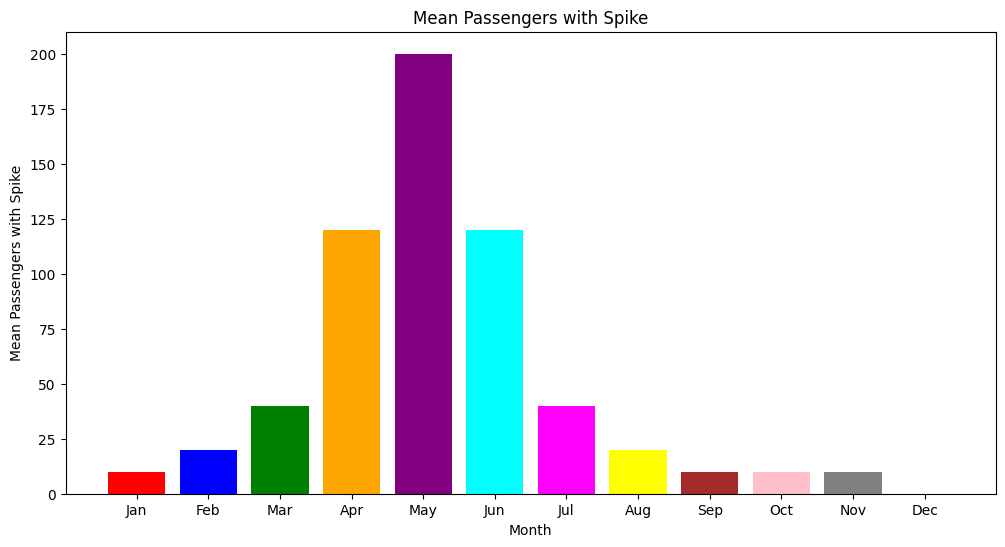

In [ ]:
#similar to how you plotted it before! (bonus: make it colorful)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan',
          'magenta', 'yellow', 'brown', 'pink', 'gray', 'olive']

plt.figure(figsize=(12, 6))
plt.bar(months, spiked_data_list, color=colors)

plt.xlabel("Month")
plt.ylabel("Mean Passengers with Spike")
plt.title("Mean Passengers with Spike")
plt.show()


## Compare!

Now, all thats left is to compare the graphs

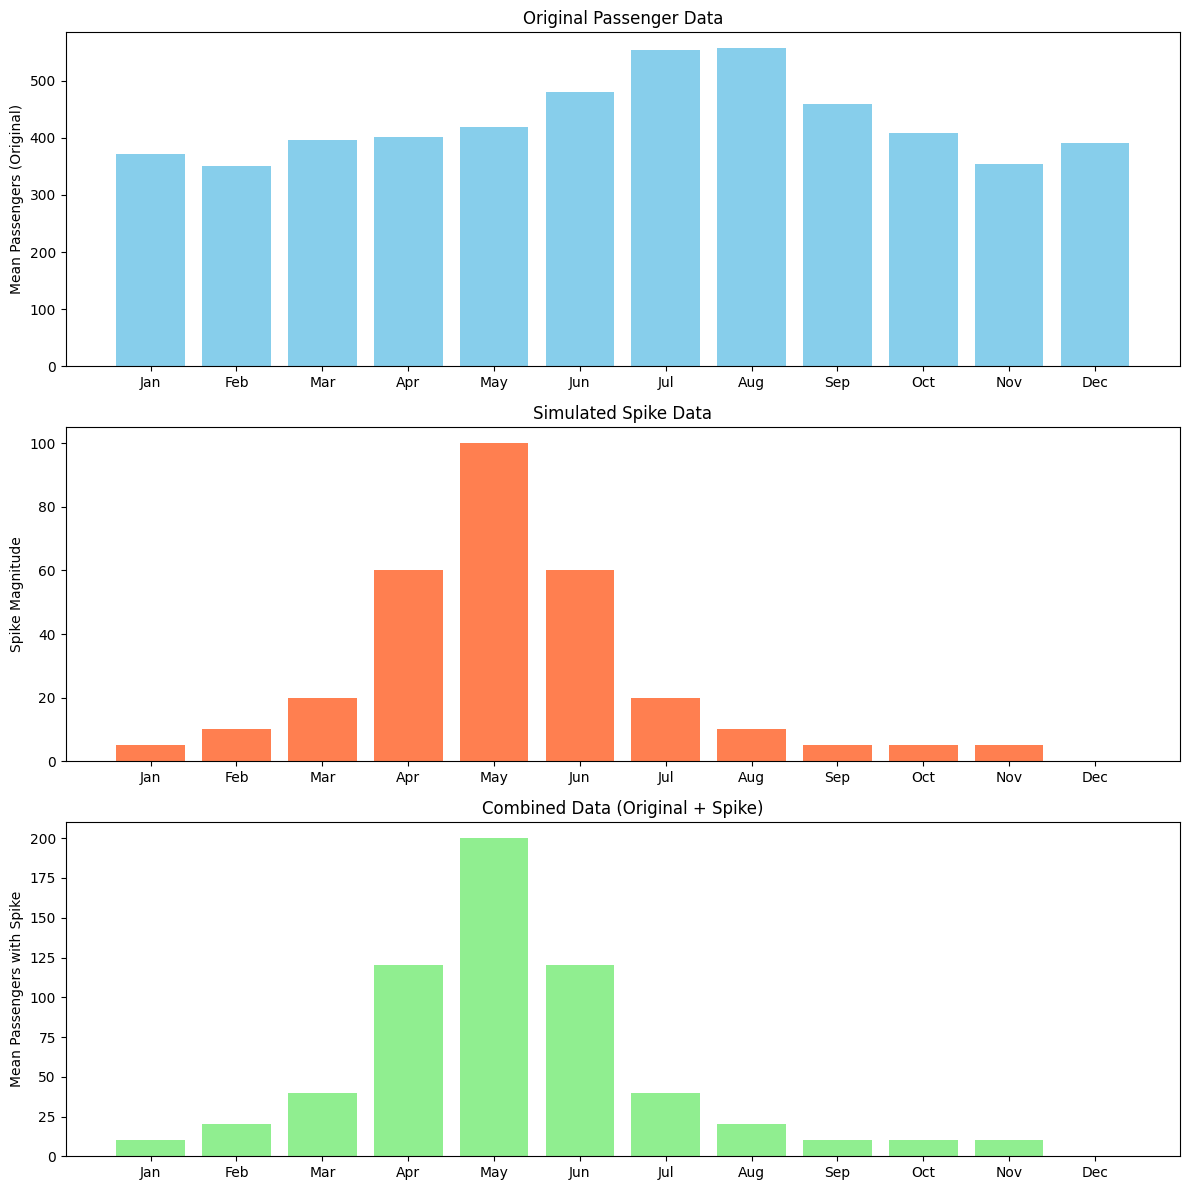

In [ ]:
#Create a subplot with first and second plot, along with a graph showing how the data has changed before and after spike (could be a bar graph, upto you, be creative)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, axs = plt.subplots(3, 1, figsize=(12, 12))

axs[0].bar(months, mean_passengers, color='skyblue')
axs[0].set_ylabel("Mean Passengers (Original)")
axs[0].set_title("Original Passenger Data")

axs[1].bar(months, spike_data, color='coral')
axs[1].set_ylabel("Spike Magnitude")
axs[1].set_title("Simulated Spike Data")

axs[2].bar(months, spiked_data_list, color='lightgreen')
axs[2].set_ylabel("Mean Passengers with Spike")
axs[2].set_title("Combined Data (Original + Spike)")

plt.tight_layout()
plt.show()
